 Tutaj zaimportuj wymagane biblioteki

In [83]:
import psycopg2
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import numpy as np
import matplotlib.pyplot as plt


 ## Połączenie z bazą danych
 Tutaj uzupełnij konfigurację połączenia

In [2]:
username = 'postgres'
password = 'password'

host = 'localhost'
database = 'airlines'
port = 5432

 Tutaj stwórz zmienną engine, która zostanie użyta do połączenia z bazą danych

In [3]:
url_object = URL.create(
    "postgresql+psycopg2",
    username="postgres",
    password="password",  
    host="localhost",
    database="airlines",
)

engine = create_engine(url_object)
connection = engine.connect()

 Tutaj uzupełnij implementację metody `read_sql_table`

In [4]:
flight_df_raw = pd.read_sql_table('flight', connection)

 Tutaj zaczytaj zapisaną wcześniej ramkę danych `flight_df` do zmniennej o takiej samej nazwie

In [31]:
flight_df = pd.read_csv(r'C:\Users\admin\Desktop\Koncowego_sprawdzony\notebooks\flight_df_02.csv')
flight_df

,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,weather_delay,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2005.0,2004.0
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,NaN,2019,False,True,1100.0,2016.0,2013.0
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,0.0,10.0,0.0,3.0,2019,False,True,1100.0,1998.0,1995.0
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,NaN,2019,False,True,1100.0,1998.0,1995.0
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,NaN,2019,False,True,500.0,2001.0,1998.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,NaN,2019,False,False,500.0,2017.0,2016.0
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,0.0,19.0,0.0,0.0,2019,True,False,1000.0,1992.0,1989.0
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,NaN,2019,False,False,500.0,1992.0,1989.0
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,0.0,66.0,0.0,0.0,2019,True,False,1000.0,2016.0,2013.0


 Tutaj wczytaj ramkę `airport_list_df`

In [32]:
airport_list_df = pd.read_sql_table('airport_list', connection)

 Tutaj sprawdż, czy występują duplikaty dla kolumny `origin_airport_id`

In [33]:
airport_list_df.drop_duplicates(subset=['origin_airport_id'], inplace=True)

 Tutaj usuń duplikaty – jeśli występują

In [34]:
airport_list_df

,id,origin_airport_id,display_airport_name,origin_city_name,name
0,1,11638,Fresno Air Terminal,"Fresno, CA","FRESNO YOSEMITE INTERNATIONAL, CA US"
1,2,13342,General Mitchell Field,"Milwaukee, WI","MILWAUKEE MITCHELL AIRPORT, WI US"
2,3,13244,Memphis International,"Memphis, TN","MEMPHIS INTERNATIONAL AIRPORT, TN US"
3,4,15096,Syracuse Hancock International,"Syracuse, NY","SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US"
4,5,10397,Atlanta Municipal,"Atlanta, GA",ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...
...,...,...,...,...,...
92,93,13198,Kansas City International,"Kansas City, MO","KANSAS CITY INTERNATIONAL AIRPORT, MO US"
93,94,10423,Austin - Bergstrom International,"Austin, TX","AUSTIN BERGSTROM INTERNATIONAL AIRPORT, TX US"
94,95,15370,Tulsa International,"Tulsa, OK","OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US"
95,96,13303,Miami International,"Miami, FL","MIAMI INTERNATIONAL AIRPORT, FL US"


 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `origin_airport_id`

In [35]:
# flight_df = flight_df.merge(airport_list_df[['origin_airport_id', 'origin_city_name']], 
#                                  left_on='origin_airport_id', 
#                                  right_on='origin_airport_id', 
#                                  how='left')
flight_df = flight_df.merge(airport_list_df[['origin_airport_id', 'origin_city_name']], on='origin_airport_id', how='left')
flight_df



,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,...,nas_delay,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,NaN,2019,False,True,1100.0,2005.0,2004.0,"Atlanta, GA"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,NaN,2019,False,True,1100.0,2016.0,2013.0,"Atlanta, GA"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,10.0,0.0,3.0,2019,False,True,1100.0,1998.0,1995.0,"Atlanta, GA"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,NaN,2019,False,True,1100.0,1998.0,1995.0,"Atlanta, GA"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,NaN,2019,False,True,500.0,2001.0,1998.0,"Atlanta, GA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057386,1382967,12,11,3,DL,N321DH,1826,13303,10397,1807,...,NaN,NaN,NaN,2019,False,False,500.0,2017.0,2016.0,"Miami, FL"
1057387,1382968,12,11,3,DL,N329NW,1982,13303,12953,1959,...,19.0,0.0,0.0,2019,True,False,1000.0,1992.0,1989.0,"Miami, FL"
1057388,1382969,12,11,3,DL,N331NW,1987,13303,10397,1125,...,NaN,NaN,NaN,2019,False,False,500.0,1992.0,1989.0,"Miami, FL"
1057389,1382970,12,11,3,DL,N309DN,2151,13303,12953,700,...,66.0,0.0,0.0,2019,True,False,1000.0,2016.0,2013.0,"Miami, FL"


 Tutaj dokonaj złączenia ramki `flight_df` oraz `airport_list_df` używając `destination_airport_id`

In [36]:


# flight_df = flight_df.merge(airport_list_df[['origin_airport_id', 'origin_city_name']], 
#                                       left_on='dest_airport_id', 
#                                       right_on='origin_airport_id', 
#                                       how='left')

# flight_df = flight_df.rename(columns={'origin_city_name_y': 'destination_city_name'})
# flight_df = flight_df.rename(columns={'origin_city_name_x': 'origin_city_name'})

# flight_df = flight_df.drop(['origin_airport_id_y'], axis=1)
# flight_df = flight_df.rename(columns={'origin_airport_id_x': 'origin_airport_id'})
# flight_df
# Połączenie z airport_list_df po dest_airport_id
flight_df = flight_df.merge(airport_list_df[['origin_airport_id', 'origin_city_name']], left_on='dest_airport_id', right_on='origin_airport_id', how='left')
#print(flight_df.head())
# Zmiana nazwy kolumny 'origin_city_name' na 'destination_city_name'
flight_df = flight_df.rename(columns={'origin_city_name_y': 'destination_city_name'})
flight_df = flight_df.rename(columns={'origin_city_name_x': 'origin_city_name'})
flight_df = flight_df.rename(columns={'origin_airport_id_x': 'origin_airport'})
flight_df.drop('origin_airport_id_y', axis=1, inplace=True)
flight_df.head()


,id,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport,dest_airport_id,crs_dep_time,...,security_delay,late_aircraft_delay,year,is_delayed,is_weekend,distance_agg,manufacture_year,manufacture_year_agg,origin_city_name,destination_city_name
0,1,1,20,7,WN,N204WN,682,10397,11292,605,...,NaN,NaN,2019,False,True,1100.0,2005.0,2004.0,"Atlanta, GA","Denver, CO"
1,2,1,20,7,WN,N8682B,2622,10397,11292,2120,...,NaN,NaN,2019,False,True,1100.0,2016.0,2013.0,"Atlanta, GA","Denver, CO"
2,3,1,20,7,WN,N717SA,2939,10397,11292,1800,...,0.0,3.0,2019,False,True,1100.0,1998.0,1995.0,"Atlanta, GA","Denver, CO"
3,4,1,20,7,WN,N709SW,3848,10397,11292,1355,...,NaN,NaN,2019,False,True,1100.0,1998.0,1995.0,"Atlanta, GA","Denver, CO"
4,5,1,20,7,WN,N7864B,1352,10397,11697,1125,...,NaN,NaN,2019,False,True,500.0,2001.0,1998.0,"Atlanta, GA","Fort Lauderdale, FL"


 Tutaj wyznacz ramkę `top_airports_origin_df`

In [41]:
top_airports_origin_df = flight_df.groupby("origin_city_name")["id"].count().nlargest(10).reset_index()
top_airports_origin_df = top_airports_origin_df.rename(columns={"id": "count"})
top_airports_origin_df

,origin_city_name,count
0,"Atlanta, GA",123162
1,"Chicago, IL",105437
2,"Los Angeles, CA",87849
3,"New York, NY",75785
4,"Denver, CO",64525
5,"Boston, MA",55989
6,"Seattle, WA",50465
7,"San Francisco, CA",50124
8,"Dallas/Fort Worth, TX",39511
9,"Las Vegas, NV",38456


 Tutaj wyznacz ramkę `top_airports_destination_df`

In [47]:
top_airports_destination_df = flight_df.groupby("destination_city_name")["id"].count().nlargest(10).reset_index()
top_airports_destination_df = top_airports_destination_df.rename(columns={"id": "count"})
top_airports_destination_df

,destination_city_name,count
0,"Atlanta, GA",122945
1,"Chicago, IL",100333
2,"Los Angeles, CA",87776
3,"New York, NY",75769
4,"Denver, CO",64602
5,"Boston, MA",56057
6,"Seattle, WA",50230
7,"San Francisco, CA",49999
8,"Dallas/Fort Worth, TX",39488
9,"Las Vegas, NV",38494


### Sprawdzenie dla `top_airport_destination`

In [46]:
top_airports_destination_head = (top_airports_destination_df['count']
                                 .sort_values(ascending=False)
                                 .head()
                                 .tolist()
                                 )
top_airports_destination_head = tuple(top_airports_destination_head)
top_airports_destination_head_expected = (122945, 100333, 87776, 64602, 57686)
assert top_airports_destination_head == top_airports_destination_head_expected, f"Nie zgadza się top 5 wierszy, oczekiwano wyników: {top_airports_destination_head_expected} otrzymano: {top_airports_destination_head}"

 Tutaj wczytaj ramkę `airport_weather`

In [74]:
airport_weather_df = pd.read_sql_table('airport_weather', connection)
airport_weather_df.head()
airport_weather_df.columns

Index(['id', 'station', 'name', 'date', 'awnd', 'pgtm', 'prcp', 'snow', 'snwd',
       'tavg', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5', 'wt01', 'wt02',
       'wt03', 'wt04', 'wt05', 'wt06', 'wt07', 'wt08', 'wt09', 'wesd', 'wt10',
       'psun', 'tsun', 'sn32', 'sx32', 'tobs', 'wt11', 'wt18'],
      dtype='object')

 Tutaj oczyść ramkę `airport_weather_df` z nadmiarowych kolumn

In [75]:
airport_weather_df = airport_weather_df.loc[:, ['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd']]
airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42
...,...,...,...,...,...,...,...,...
46221,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-27,0.21,NaN,NaN,59.0,3.58
46222,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-28,1.29,NaN,NaN,77.0,6.93
46223,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-29,0.02,NaN,NaN,78.0,16.55
46224,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-30,0.00,NaN,NaN,57.0,13.42


 Tutaj połącz ramki `airport_list_df` oraz `airport_weather_df` aktualizując `airport_weather_df`

In [76]:
# połączenie airport_weather_df z airport_list_df
merged_df = pd.merge(airport_weather_df, airport_list_df[['name', 'origin_airport_id']], on='name', how='left')

# # usunięcie lotniks dla których brakuje danych pogodowych o kolumnie "origin_airport_id"
merged_df.dropna(subset=['origin_airport_id'], inplace=True)

# # pozostawienie wskazanych kolumn + origin_airport_id
airport_weather_df = merged_df.loc[:, ['station', 'name', 'date', 'prcp', 'snow', 'snwd', 'tmax', 'awnd', 'origin_airport_id']]

airport_weather_df

,station,name,date,prcp,snow,snwd,tmax,awnd,origin_airport_id
0,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-01,0.14,0.0,0.0,66.0,4.70,10397.0
1,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-02,0.57,0.0,0.0,59.0,4.92,10397.0
2,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-03,0.15,0.0,0.0,55.0,5.37,10397.0
3,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-04,1.44,0.0,0.0,66.0,12.08,10397.0
4,USW00013874,ATLANTA HARTSFIELD JACKSON INTERNATIONAL AIRPO...,2019-01-05,0.00,0.0,0.0,59.0,13.42,10397.0
...,...,...,...,...,...,...,...,...,...
51235,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-27,0.21,NaN,NaN,59.0,3.58,14122.0
51236,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-28,1.29,NaN,NaN,77.0,6.93,14122.0
51237,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-29,0.02,NaN,NaN,78.0,16.55,14122.0
51238,USW00014762,"PITTSBURGH ALLEGHENY CO AIRPORT, PA US",2020-03-30,0.00,NaN,NaN,57.0,13.42,14122.0


 ### Sprawdzenie
 Uruchom kod poniżej, aby sprawdzić, czy ta część została poprawnie wykonana

In [77]:
airport_weather_df_expected_shape = (43394, 9)
airport_weather_df_shape = airport_weather_df.shape

assert airport_weather_df_expected_shape == airport_weather_df_shape, \
  f'Nieodpowiedni wymiar ramki airport_weather_df, oczekiwano (wierszy, kolumn): {airport_weather_df_expected_shape}'


 Tutaj zrzutuj kolumnę `date` na `DATETIME` w ramce `airport_weather_df`

In [78]:
airport_weather_df['date'] = pd.to_datetime(airport_weather_df['date'])


 Tutaj stwórz kolumnę `date` w ramce `flight_df`. Pamiętaj, aby była ona również typu `DATETIME`.

In [79]:
flight_df['date'] = pd.to_datetime(flight_df[['year', 'month', 'day_of_month']].astype(str).agg('-'.join, axis=1))

# zrzutujemy kolumnę date na typ DATETIME
flight_df['date'] = pd.to_datetime(flight_df['date'])

 Tutaj złącz tabeli `airport_weather_df` oraz `flight_df`

In [80]:
flight_df = pd.merge(flight_df, airport_weather_df, how='left', left_on=['origin_airport', 'date'], right_on=['origin_airport_id', 'date'])

 ## Analiza dla kolumny `tmax`

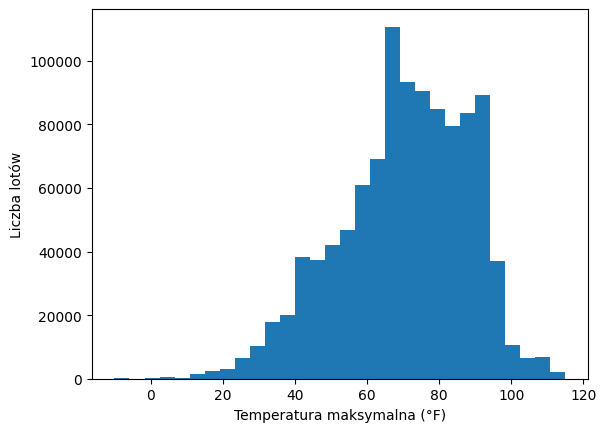

In [84]:
plt.hist(flight_df['tmax'], bins=30)
plt.xlabel('Temperatura maksymalna (°F)')
plt.ylabel('Liczba lotów')
plt.show()

In [85]:
flight_df.dropna(subset=['tmax'], inplace=True)

In [86]:
temp_bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90), (90, 100)])

In [87]:
flight_df['temp_range'] = pd.cut(flight_df['tmax'], bins=temp_bins)

In [88]:
delayed_by_temp = flight_df.groupby('temp_range')['is_delayed'].mean()

In [89]:
delayed_by_temp.round(2)

temp_range
(0, 10]      0.42
(10, 20]     0.32
(20, 30]     0.25
(30, 40]     0.24
(40, 50]     0.19
(50, 60]     0.19
(60, 70]     0.18
(70, 80]     0.18
(80, 90]     0.19
(90, 100]    0.20
Name: is_delayed, dtype: float64

Text(0, 0.5, 'Średni odsetek opóźnień')

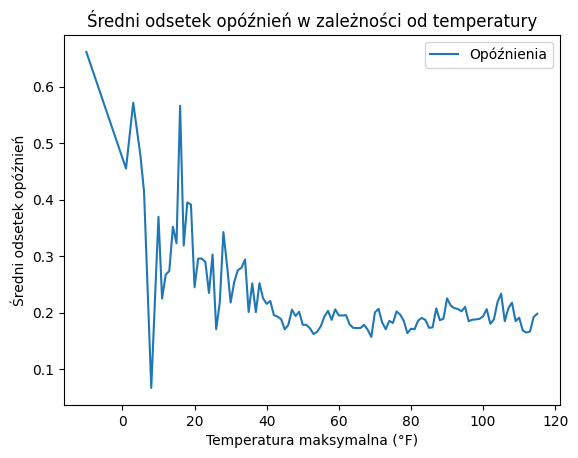

In [90]:
# grupowanie po kolumnie tmax i obliczenie średniej wartości dla kolumny is_delayed
delayed_by_temp = flight_df.groupby('tmax')['is_delayed'].mean()

# konwersja wyniku grupowania na ramkę danych
delayed_by_temp = delayed_by_temp.reset_index()

# wykres liniowy
delayed_by_temp.plot(x='tmax', y='is_delayed', kind='line', label='Opóźnienia')

# tytuł i etykiety osi
plt.title('Średni odsetek opóźnień w zależności od temperatury')
plt.xlabel('Temperatura maksymalna (°F)')
plt.ylabel('Średni odsetek opóźnień')

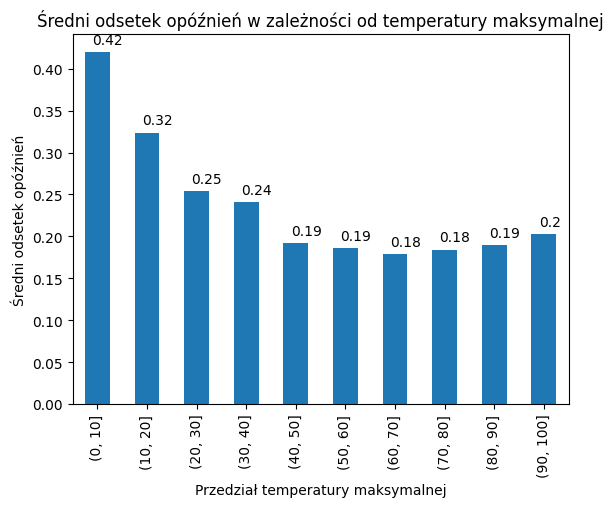

In [91]:

# grupowanie danych i obliczenie średniego odsetka opóźnień dla każdego przedziału temperatury maksymalnej
delayed_by_temp = flight_df.groupby('temp_range')['is_delayed'].mean()

# utworzenie wykresu słupkowego z zaokrąglonymi wartościami na końcach kolumny
ax = delayed_by_temp.plot(kind='bar')
for i, v in enumerate(delayed_by_temp):
    ax.text(i - 0.1, v + 0.01, str(round(v, 2)))

# dodanie tytułu i opisu osi
plt.title('Średni odsetek opóźnień w zależności od temperatury maksymalnej')
plt.xlabel('Przedział temperatury maksymalnej')
plt.ylabel('Średni odsetek opóźnień')

# wyświetlenie wykresu
plt.show()